In [26]:
from sklearn.datasets import fetch_openml
import numpy as np
raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

c:\Users\master\.conda\envs\tensorflow\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
print(raw_data.shape)
print(np.max(raw_data), np.min(raw_data))
print(np.unique(raw_labels))

(70000, 784)
255.0 0.0
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [28]:
nsamples = 5000
data = raw_data[:nsamples]
labels = raw_labels[:nsamples]

Нормируем

In [29]:
data = data/255.0
labels = labels.astype('int')
images = data.reshape(data.shape[0], 28, 28)

AttributeError: 'DataFrame' object has no attribute 'reshape'

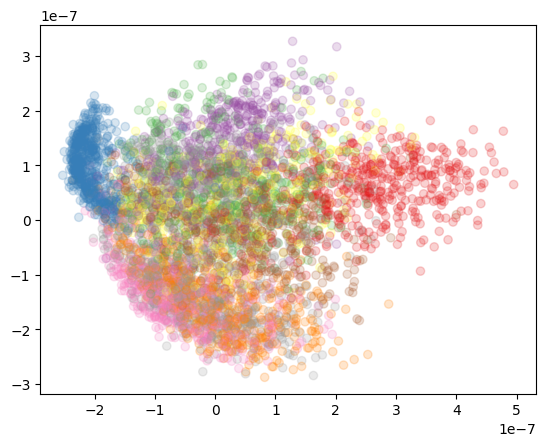

In [ ]:
import matplotlib.pyplot as plt 
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.2, cmap='Set1')

t-SNE в наборе данных MNIST ¶
С помощью PCA мы нашли две линейные комбинации исходных 784 переменных, которые максимизируют общую дисперсию набора данных, со смешанными результатами.

Исходное пространство 784D по большей части пусто: если мы выберем точку в этом пространстве случайным образом, мы просто получим случайное значение для каждого пикселя и шумовое изображение.

Реальные изображения на самом деле занимают очень небольшую часть исходного пространства, и считается, что они живут во многих многомерностях гораздо более низкого измерения, которые изгибаются, как ленты, в пространстве 784D.

Если это правда, цифры данного класса будут находиться на одной ленте. Если лента занимает только угол пространства 784D, PCA покажет ее как кластер в плоскости, определяемой двумя главными компонентами. Но если лента пройдет через все пространство 784D, PCA мало что сможет нам сказать.

В этом разделе мы попытаемся уменьшить размерность набора данных с помощью t-SNE (t-распределенное стохастическое встраивание соседей).

Теория этого алгоритма описана в оригинальной статье Ван дер Маате и Хинтона. Но это не так просто, поэтому пока вам просто нужно знать, что t-SNE пытается сохранить топологию исходного пространства:



Иллюстрация t-SNE, проецирующего набор 3D-данных в 2D. Точки набора данных располагаются на одномерных многообразиях (линиях) в трехмерном пространстве. Мы рассматриваем набор данных только с одной категорией слева и двумя категориями справа.

In [ ]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(data)

Text(0, 0.5, 't-SNE-2')

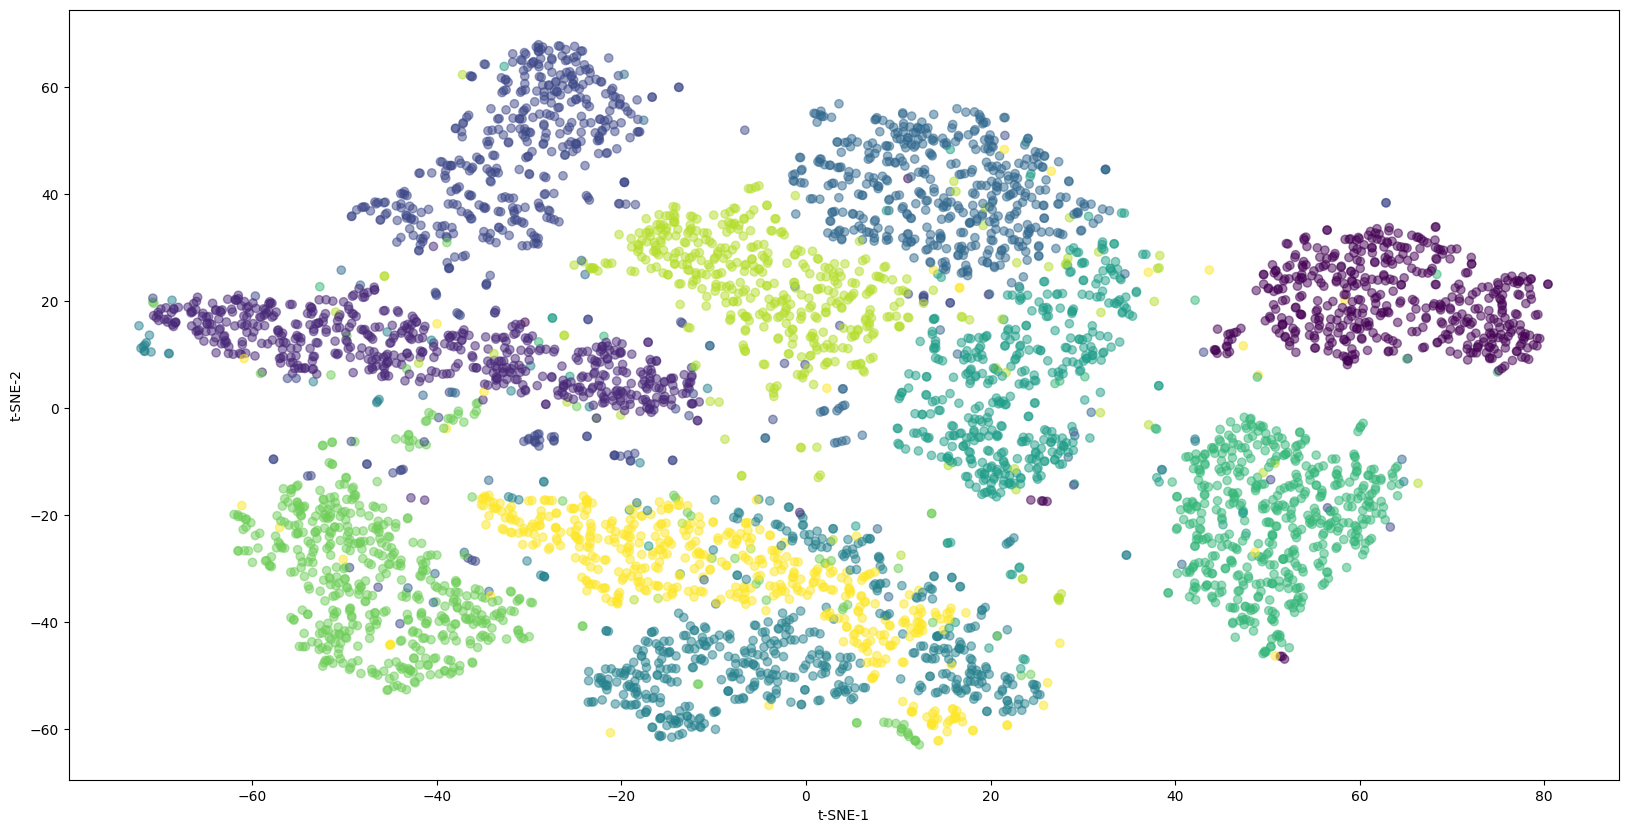

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = load_digits(return_X_y=True)

print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


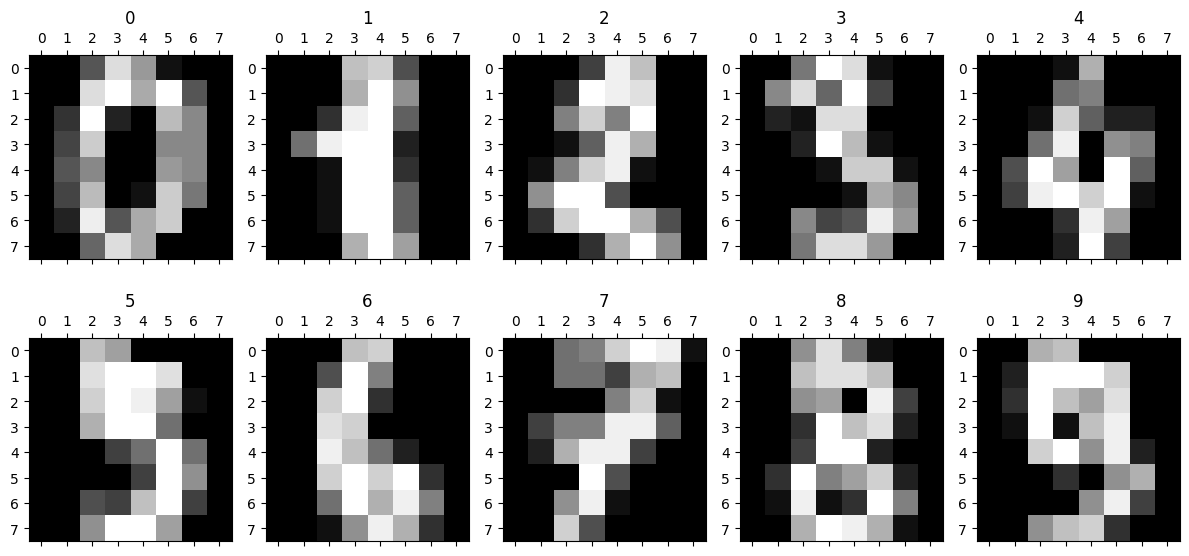

In [43]:
# Отображение изображений первых 10 цифр
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show()

In [40]:
from sklearn.manifold import TSNE
embed = TSNE(
    n_components=2, # значение по умолчанию=2. Размерность вложенного пространства.
    perplexity=10, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
    early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
    learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
    n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
    n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
    min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
    metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
    init='random',# {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
    verbose=0, # значение по умолчанию=0. Уровень детализации.
    random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
    method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
    angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
    n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
)
# Преобразование X
X_embedded = embed.fit_transform(X)

In [44]:
# Вывод результатов
print('New Shape of X: ', X_embedded.shape)
print('Kullback-Leibler divergence after optimization: ', embed.kl_divergence_)
print('No. of iterations: ', embed.n_iter_)
#вывод('Embedding vectors: ', embed.embedding_)

New Shape of X:  (1797, 2)
Kullback-Leibler divergence after optimization:  0.832757830619812
No. of iterations:  4999


In [49]:
import plotly.express as px
# Создание диаграммы разброса
fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], 
                 labels={
                     "x": "Dimension 1",
                     "y": "Dimension 2",
                 },
                 opacity=1, color=y.astype(str))

# Изменение цвета фона графика
fig.update_layout(dict(plot_bgcolor = 'white'))

# Обновление линий осей
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Установка названия рисунка
fig.update_layout(title_text="t-SNE")

# Обновление размера маркера
fig.update_traces(marker=dict(size=3))

fig.show()